<a href="https://colab.research.google.com/github/SEYDINA04/translated-content/blob/main/Classifier_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CLASSIFICATION D'UN CHIEN OU CHAT*** 🐕 ou 🐱

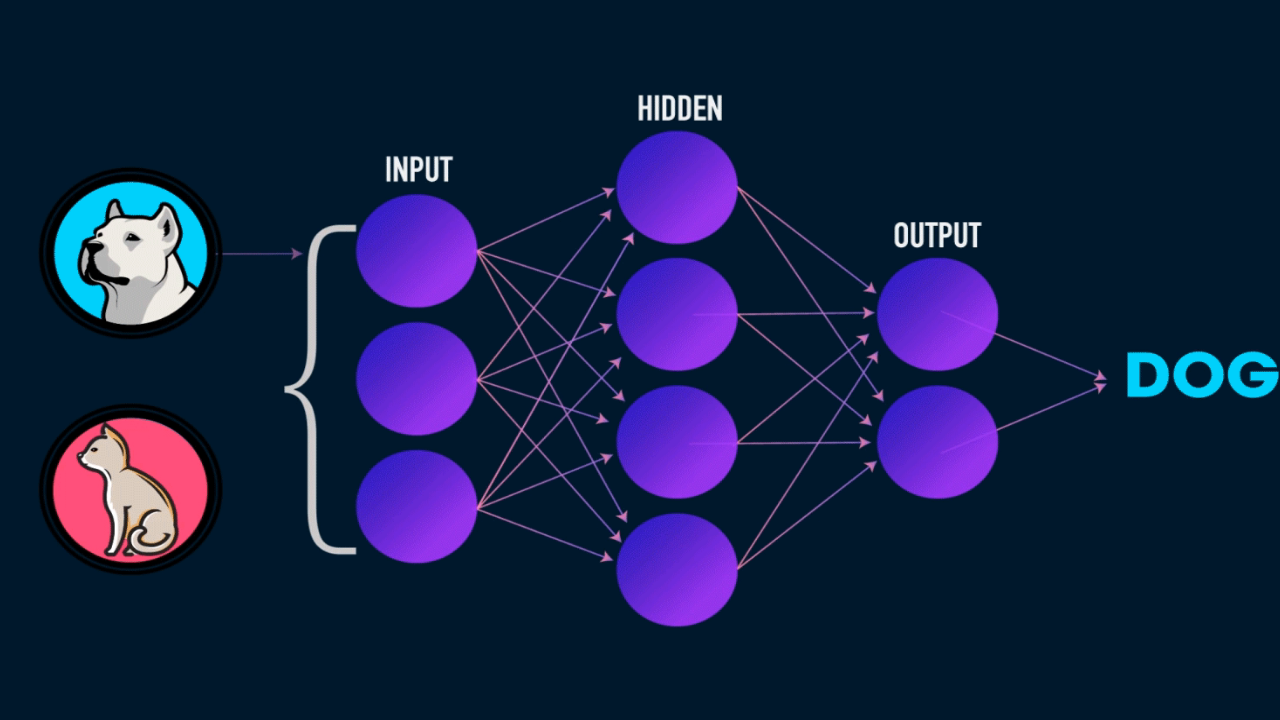

In [ ]:
# @title IMPORTATION BIBLIOTHEQUE MATHEMETIQUE ET GRAPHIQUE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2024-02-14 10:45:32--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.27, 172.217.0.91, 172.217.12.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   218MB/s    in 0.3s    

2024-02-14 10:45:32 (218 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# @title OS, ZIPFILE & EXTRACTION
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# @title REDIRECTION VERS LE REPERTOIRE DES FICHIERS
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#repertoires avec nos photos(d'entrainement) de chiens et de chats
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#repertoires avec nos photos(de validation) de chiens et de chats
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# @title LISTE DE QUELQUES FICHIERS [11C DE CHAT & 12C DE CHIEN]
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:11])
print(train_dog_fnames[:12])

['cat.828.jpg', 'cat.216.jpg', 'cat.267.jpg', 'cat.681.jpg', 'cat.411.jpg', 'cat.484.jpg', 'cat.0.jpg', 'cat.784.jpg', 'cat.653.jpg', 'cat.732.jpg', 'cat.624.jpg']
['dog.542.jpg', 'dog.735.jpg', 'dog.56.jpg', 'dog.633.jpg', 'dog.614.jpg', 'dog.112.jpg', 'dog.433.jpg', 'dog.701.jpg', 'dog.786.jpg', 'dog.670.jpg', 'dog.185.jpg', 'dog.678.jpg']


In [ ]:
# @title NOMBRE TOTAL IMGS TRAINSET & TESTSET DE CHAT ET CHIEN
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


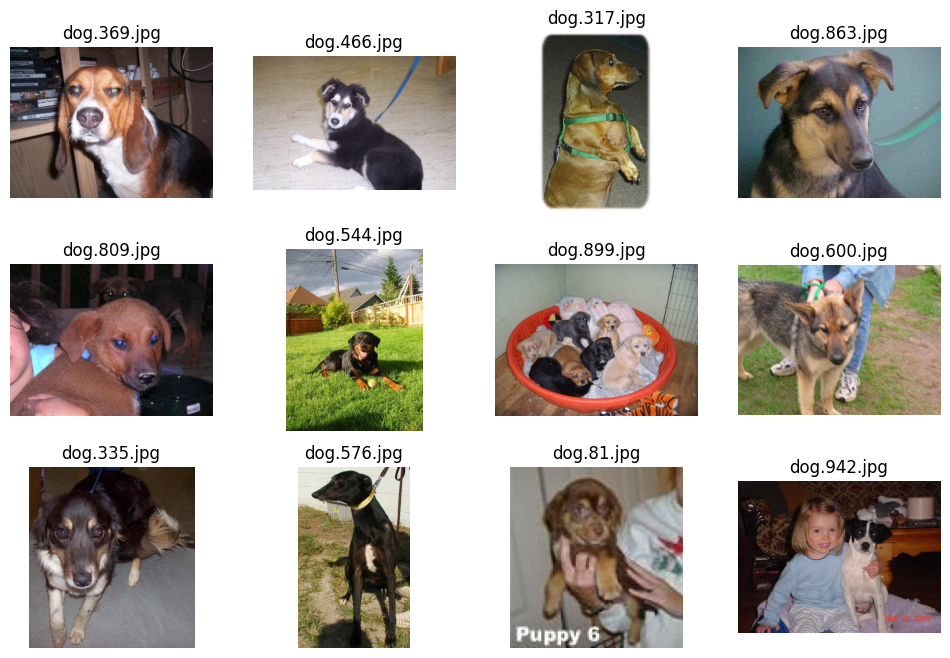

In [ ]:
# @title AFFICHAGE GRILLE IMGS CHIENT DEPUIS LE REPERTOITRE
samples_dogs = np.random.choice(os.listdir(train_dogs_dir),size = 12)

plt.figure(figsize = (12,8))
for i,dog in enumerate(samples_dogs):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_dogs_dir,dog))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(dog)

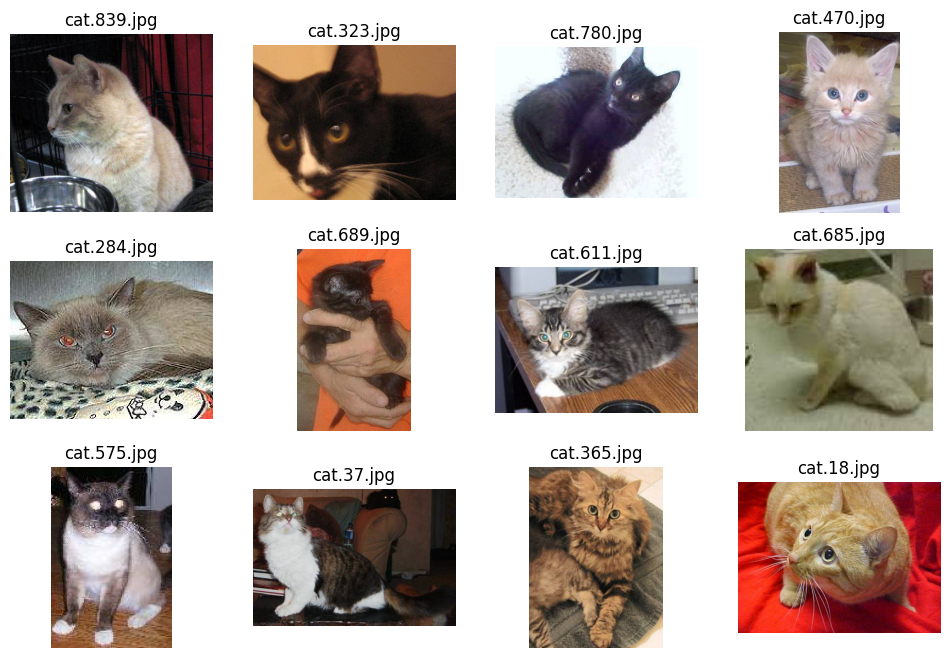

In [ ]:
# @title AFFICHAGE GRILLE IMGS CHATS DEPUIS LE REPERTOITRE
samples_cats = np.random.choice(os.listdir(train_cats_dir),size = 12)
plt.figure(figsize = (12,8))
for i,cat in enumerate(samples_cats):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_cats_dir,cat))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(cat)

In [ ]:
# @title GENERER IMGS AVEC ImageDataGenerator & NORMALISER (0,1)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),       #Les images sont redimensionnées en 150x150 pixels,
    batch_size = 20,               #Les données sont renvoyées en lots de 20 images.
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# @title CREATION DU MODEL CNN
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
# @title RECAPITULATION
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# @title COMPILATION , RMSprop, loss ,metrics
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics = ['acc'])

In [ ]:
# @title EXECUTION GOOGLE COLAB AVEC %tensorflow_version 2.x :VERIFICATION GPU

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
# @title ENTRAINNEMENT DU MODEL
history = model.fit(
    train_generator,
    steps_per_epoch=100,# 2000 images = batch_size * steps
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50 # 1000 images = batch_size * steps
)

Epoch 1/10
100/100 [==============================] - 11s 54ms/step - loss: 0.7050 - acc: 0.5260 - val_loss: 0.6947 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 6s 60ms/step - loss: 0.6960 - acc: 0.5370 - val_loss: 0.6865 - val_acc: 0.6780
Epoch 3/10
100/100 [==============================] - 5s 51ms/step - loss: 0.6798 - acc: 0.5925 - val_loss: 0.6744 - val_acc: 0.5450
Epoch 4/10
100/100 [==============================] - 6s 58ms/step - loss: 0.6445 - acc: 0.6370 - val_loss: 0.6001 - val_acc: 0.6840
Epoch 5/10
100/100 [==============================] - 5s 50ms/step - loss: 0.5997 - acc: 0.6760 - val_loss: 0.5884 - val_acc: 0.7030
Epoch 6/10
100/100 [==============================] - 6s 63ms/step - loss: 0.5510 - acc: 0.7290 - val_loss: 0.5931 - val_acc: 0.6880
Epoch 7/10
100/100 [==============================] - 5s 51ms/step - loss: 0.5339 - acc: 0.7325 - val_loss: 0.5757 - val_acc: 0.7040
Epoch 8/10
100/100 [==============================] - 7s 70ms/step -

In [ ]:
# @title MESURE DE PERFORMANCE
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

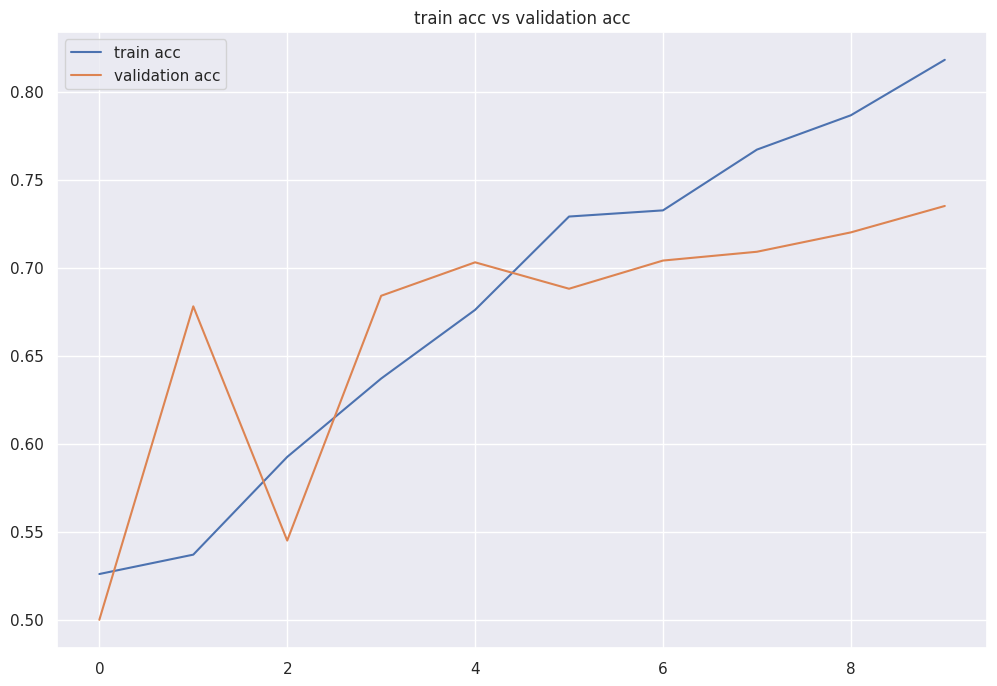

In [ ]:
# @title REPRESENTATION GRAPHIQUE
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

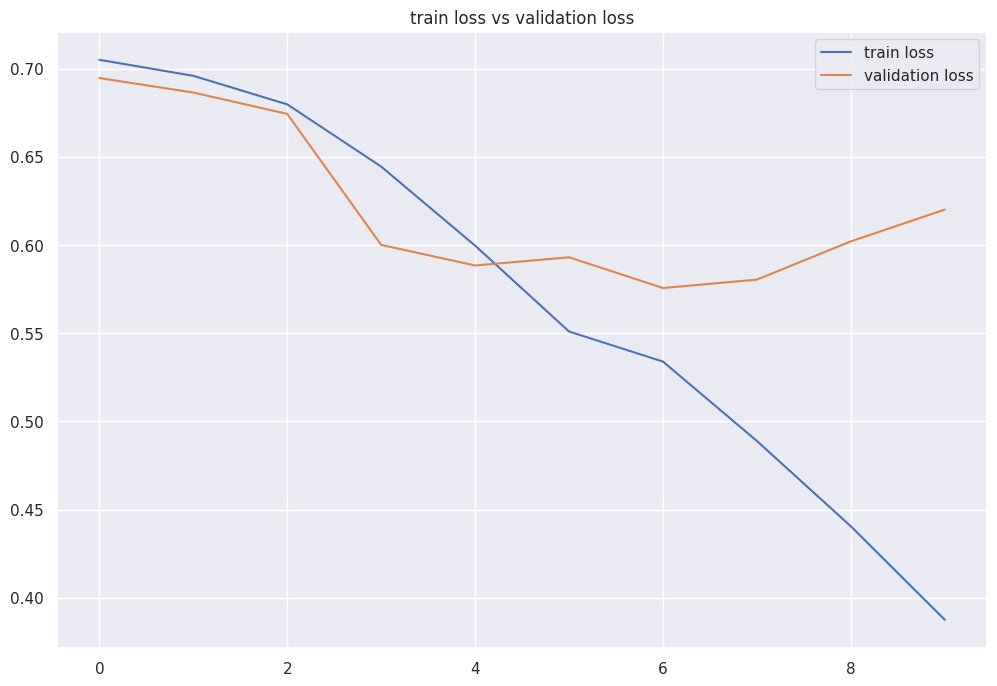

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# image augmentation

In [ ]:
# @title FEATURES INGENERING
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
from tensorflow.keras.preprocessing import image

sample_cat = np.random.choice(os.listdir(train_cats_dir))
img = image.load_img(os.path.join(train_cats_dir,sample_cat),target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

datagen_img = datagen.flow(x,batch_size = 1)

In [ ]:
x.shape

(1, 150, 150, 3)

(-0.5, 149.5, 149.5, -0.5)

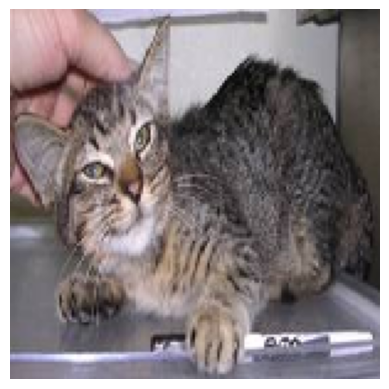

In [ ]:
plt.imshow(img)
plt.axis("off")

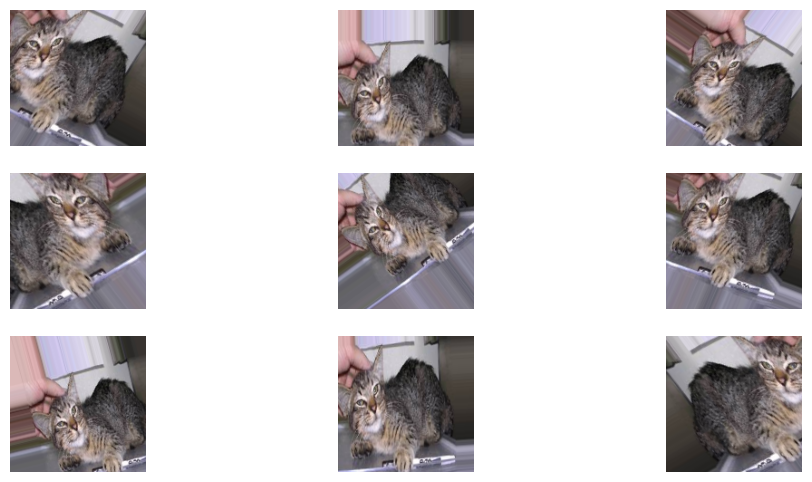

In [ ]:
plt.figure(figsize = (12,6))
for i,batch in enumerate(datagen.flow(x,batch_size = 1)):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(np.squeeze(batch).astype("int64"))
    plt.axis("off")

    if i == 8:
        break
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range=40, #va faire une rotation de l'image en choissisant un nb aleatoire entre 0 et 40
    width_shift_range=0.2, #va deplacer l'objet de 20% de sa largeur(il peut etre negatif)
    height_shift_range=0.2,
    shear_range=0.2,#va cisailler l'image de 20%
    zoom_range=0.2, # pour zoomer dans l'image de 0 a 0.2
    horizontal_flip=True, #va faire une symetrie de l'image suivant la droite qui passe par le centre de l'image
    fill_mode='nearest' #pour specifier comment arranger l'image vu qu'elle va perdre les px apeès nos operations
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss='binary_crossentropy',metrics = ['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,# 2000 images = batch_size * steps
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50 # 1000 images = batch_size * steps
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50


<ipython-input-24-f3a23dc8e6c3>:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 20s 167ms/step - loss: 0.6940 - acc: 0.4955 - val_loss: 0.6893 - val_acc: 0.5000
Epoch 2/50
100/100 [==============================] - 17s 166ms/step - loss: 0.6908 - acc: 0.5265 - val_loss: 0.6757 - val_acc: 0.6140
Epoch 3/50
100/100 [==============================] - 16s 162ms/step - loss: 0.6821 - acc: 0.5580 - val_loss: 0.6655 - val_acc: 0.5530
Epoch 4/50
100/100 [==============================] - 15s 154ms/step - loss: 0.6724 - acc: 0.5610 - val_loss: 0.6494 - val_acc: 0.6180
Epoch 5/50
100/100 [==============================] - 15s 155ms/step - loss: 0.6629 - acc: 0.5835 - val_loss: 0.6468 - val_acc: 0.5940
Epoch 6/50
100/100 [==============================] - 15s 155ms/step - loss: 0.6567 - acc: 0.5895 - val_loss: 0.6706 - val_acc: 0.5660
Epoch 7/50
100/100 [==============================] - 16s 157ms/step - loss: 0.6343 - acc: 0.6395 - val_loss: 0.6399 - val_acc: 0.6040
Epoch 8/50
100/100 [==============================] - 17s 166ms/st

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

NameError: name 'history' is not defined

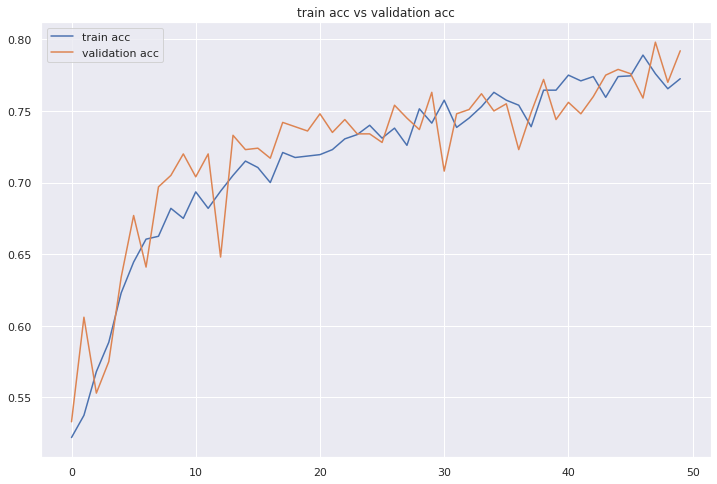

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

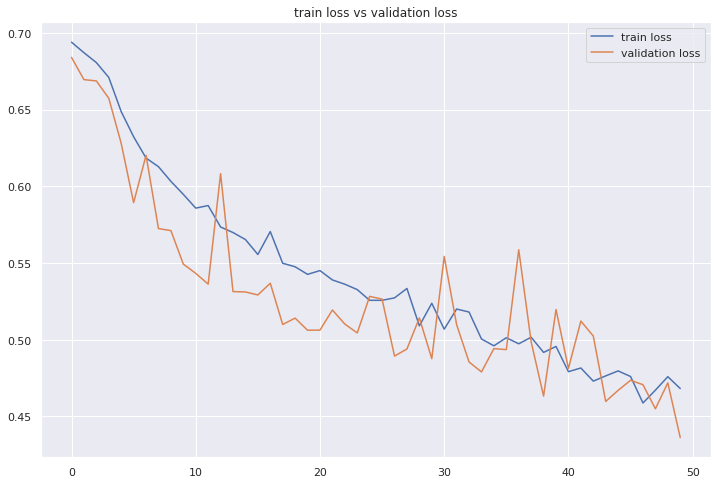

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# Prediction

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/tmp/test/chat2.jpg',target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

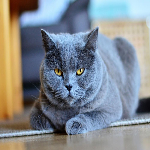

In [ ]:
img

In [ ]:
x.shape

(1, 150, 150, 3)

In [ ]:
model.predict(x)

array([[1.]], dtype=float32)

In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}